# BUSINESS UNDERSTANDING

There is need for company's to understand their consumers behaviours, tastes and preferences in order to have a competitive edge over competitors. Churn analysis determines likelihood of customers ceasing to consume products or services from a company. Proactive and data-driven businesses are able to leverage on analytics to analyse customer behaviours, strategize customer retention activities, and effectively prioritize their resources to attain business success.  This project's goal is to  develop a machine learning model for a telecommunications company that predicts likelihood of customers churning.(i.e becoming inactive and not making any transactions for 90 days). This solution will help the telecom commpany to better serve their customers by understanding which customers are at risk of leaving.

# DATA UNDERSTANDING

The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.

**user_id**: Unique identifier of a client

**REGION**: The location of each client

**TENURE**: duration in the network

**MONTANT**: top-up amount

**FREQUENCE_RECH**: number of times the customer refilled

**REVENUE**: monthly income of each client

**ARPU_SEGMENT**: income over 90 days / 3

**FREQUENCE**: number of times the client has made an income

**DATA_VOLUME**: number of connections

**ON_NET**: inter expresso call

**ORANGE**: call to orange

**TIGO**: call to Tigo

**ZONE1**: call to zones1

**ZONE2**: call to zones2

**MRG**: a client who is going

**REGULARITY**: number of times the client is active for 90 days

**TOP_PACK**: the most active packs

**FREQ_TOP_PACK**: number of times the client has activated the top pack packages

**CHURN**: variable to predict - Target

### Business questions

1. What is the relationship between tenure and churn? Are customers who have stayed longer with the telecom company most likely to churn?

2. What is the relationship between Region and Churn? Are there regions with higher churn rates than others? 

3. Deos regularity and frequence have a correlation to churn? Are customers who are likely to churn have a lower frequence and regularity number?

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8

%matplotlib inline

import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, KFold
#Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from scipy import stats

#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load train & test datasets

train = pd.read_csv(r"..\datasets\Train.csv")

test = pd.read_csv(r"..\datasets\Test.csv")

#submission = pd.read_csv('SampleSubmission.csv') (do submission.head() & .shape())

In [3]:
#Preview first five rows of train dataset
train.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [5]:
#Preview of last rows in train set
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0
1077023,28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f,FATICK,K > 24 month,1500.0,4.0,1499.0,500.0,5.0,1265.0,30.0,4.0,NaN,NaN,0.0,NO,50,On net 200F=Unlimited _call24H,2.0,0


In [7]:
#information summary on train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [8]:
#summary of numerical description in train set
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [9]:
#Are there missing values in train dataset? What's the count?
print("Missing values in train dataset")
print("----" * 7)
train.isna().sum()

Missing values in train dataset
----------------------------


user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [10]:
#  What is the percentage of missing values in train columns
percent_missing_values =( (train.isna().sum()/len(train)) * 100)

percent_missing_values.round(2).

user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64

In [9]:
#Check of duplicates in train dataset
print(f"Count of duplicates in train dataset:", train.duplicated().sum())

Count of duplicates in train dataset: 0


In [11]:
#preview of test dataset
test.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [12]:
#Information summary on test set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [13]:
#Check of missing values in test dataset.

print("Missing values in test dataset")
print("----" * 7)

test.isna().sum()

Missing values in test dataset
----------------------------


user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [14]:
#  What is the percentage of missing values in test columns
percent_missing_values =( (test.isna().sum()/len(test)) * 100)

percent_missing_values.round(2)

user_id            0.00
REGION            39.32
TENURE             0.00
MONTANT           34.92
FREQUENCE_RECH    34.92
REVENUE           33.48
ARPU_SEGMENT      33.48
FREQUENCE         33.48
DATA_VOLUME       49.11
ON_NET            36.46
ORANGE            41.38
TIGO              59.72
ZONE1             92.19
ZONE2             93.68
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.72
FREQ_TOP_PACK     41.72
dtype: float64

In [15]:
#Are there duplicates in test set?
print(f"Count of duplicates in test dataset:", test.duplicated().sum())

Count of duplicates in test dataset: 0


In [16]:
#shape of both train and test set
print(f'shape of train set: {train.shape} \n shape of test set: {test.shape}')

shape of train set: (1077024, 19) 
 shape of test set: (190063, 18)


## EDA

Check how many levels are involved in each of the categorical features (object)

Categorical features are-->[REGION, TENURE, MRG, TOP_PACK]

REGION
DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: count, dtype: int64


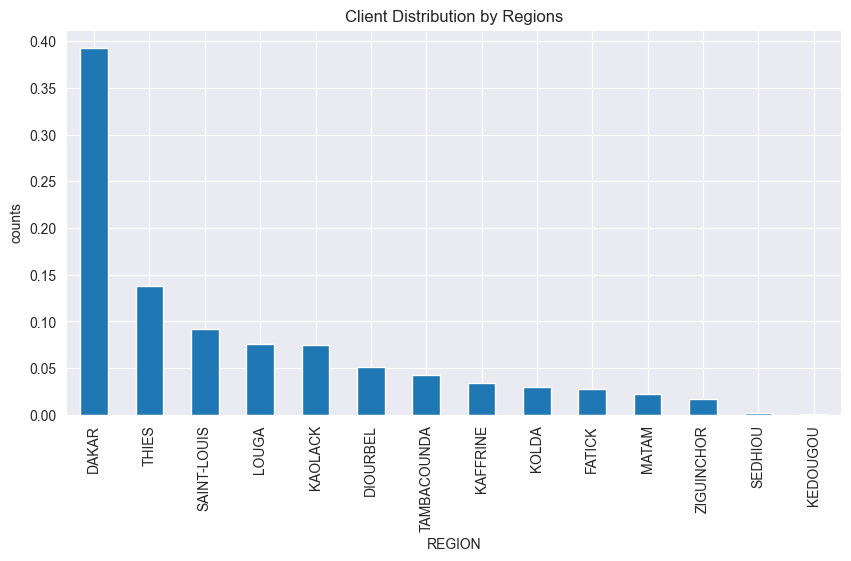

In [17]:
# Region feature

print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')
plt.title('Client Distribution by Regions')
plt.show()

TENURE
K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: count, dtype: int64


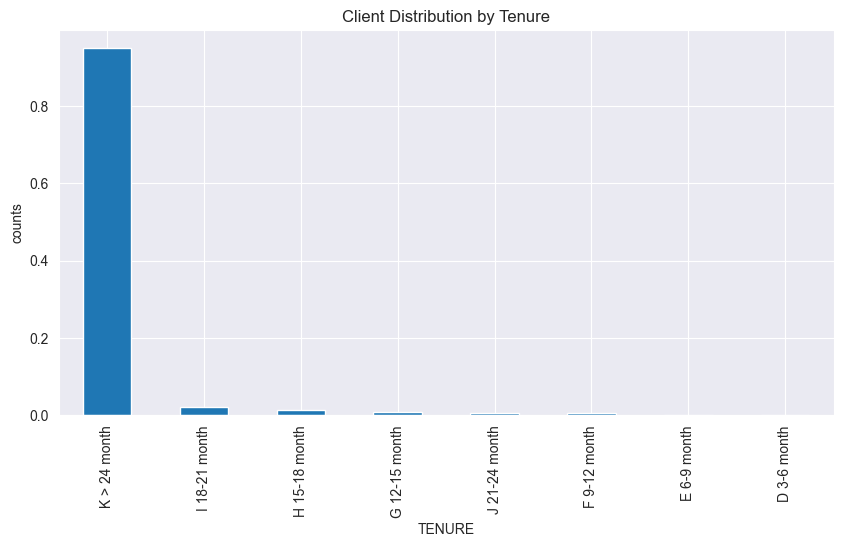

In [18]:
# Tenure feature

print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')
plt.title('Client Distribution by Tenure')
plt.show();

Majority of clients have stayed with the telecom company for more than two years.

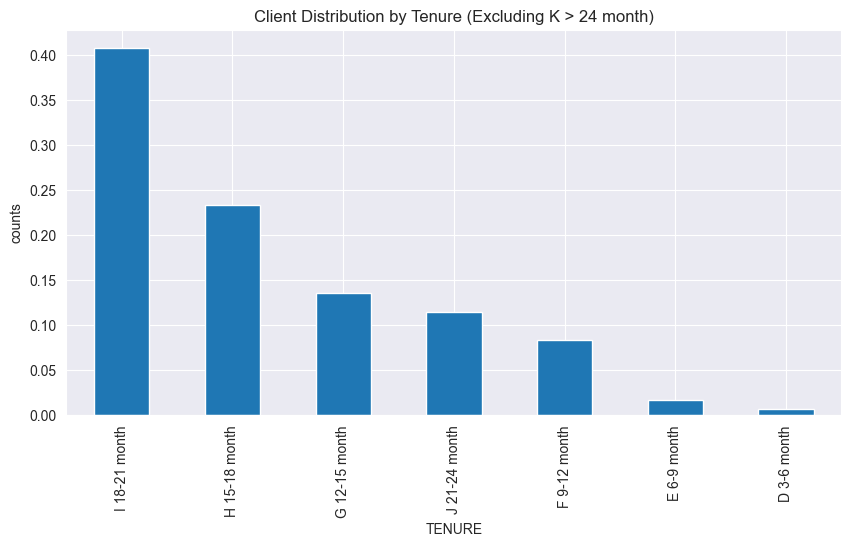

In [29]:
# Client distribution by tenure excluding 'K > 24 month'
tenure_trimmed = train[train['TENURE']!='K > 24 month']

# Visualization
plt.figure(figsize=(10,5))
tenure_trimmed['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')
plt.title('Client Distribution by Tenure (Excluding K > 24 month)')
plt.show();


MRG
NO    1077024
Name: count, dtype: int64


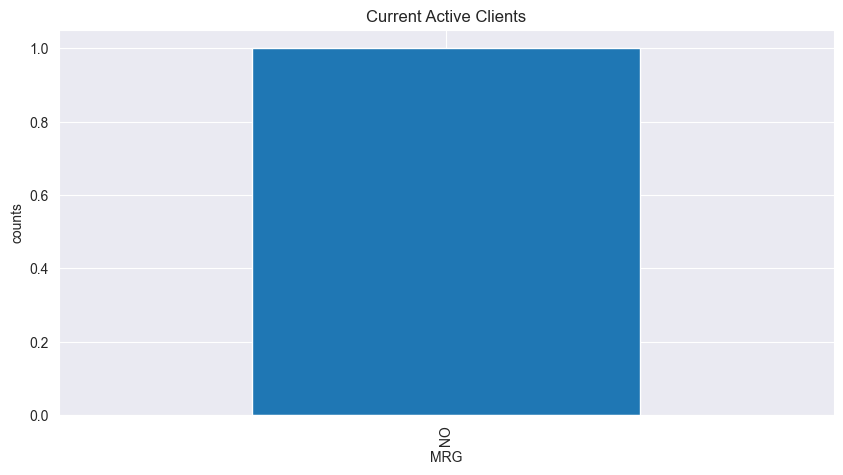

In [30]:
#visualization of current clients who have not planned to leave 

print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')
plt.title('Current Active Clients')
plt.show();

MRG column doesn't offer any valuable information in the prediction of the target, Churn. This column will be deleted.

TOP_PACK
All-net 500F=2000F;5d             158779
On net 200F=Unlimited _call24H     76302
Data:490F=1GB,7d                   57679
Data: 100 F=40MB,24H               42515
Mixt 250F=Unlimited_call24H        33620
                                   ...  
150=unlimited pilot auto               1
FIFA_TS_weekly                         1
Data_Mifi_10Go_Monthly                 1
Data_Mifi_20Go                         1
200=unlimited pilot auto               1
Name: count, Length: 126, dtype: int64


Text(0.5, 0, 'TOP_PACK')

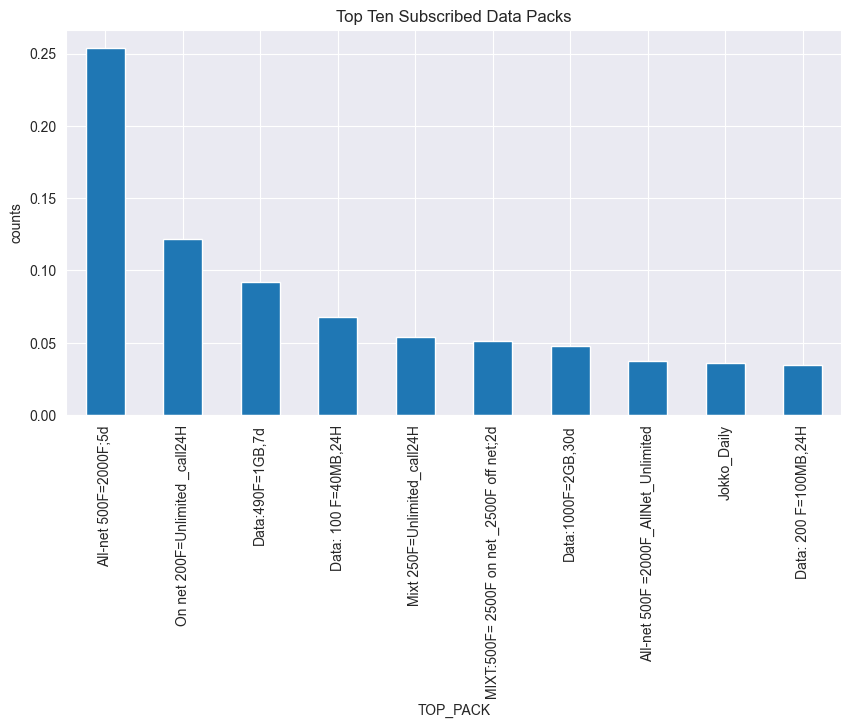

In [31]:
#TOP_PACK Feature
print(train['TOP_PACK'].value_counts())

#Visualization of ten of the most subscribed data packs by customers
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.title('Top Ten Subscribed Data Packs')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

CHURN
No     875031
Yes    201993
Name: count, dtype: int64


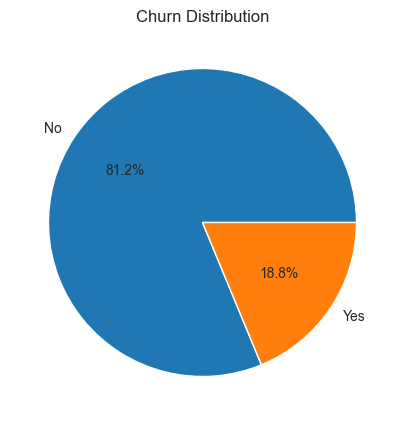

In [49]:
# Churn feature
#Check if the predictor class is balanced 
churn_count = train['CHURN'].replace({0:'No', 1:'Yes'})
churn_count = churn_count.value_counts()

print(churn_count)

#Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show();

1. What is the relationship between tenure and churn? Are customers who have stayed longer with the telecom company most likely to churn?

2. What is the relationship between Region and Churn? Are there regions with higher churn rates than others? 



In [21]:
#copy of train for visualization purposes

train_c = train.copy()
#Drop columns with many missing values
df = train_c.drop(columns=['ZONE1', 'ZONE2', 'TIGO'], axis=1) 
# Drop rows with missing values
df = df.dropna()

1. What is the relationship between tenure and churn? Are customers who have stayed longer with the telecom company most likely to churn?

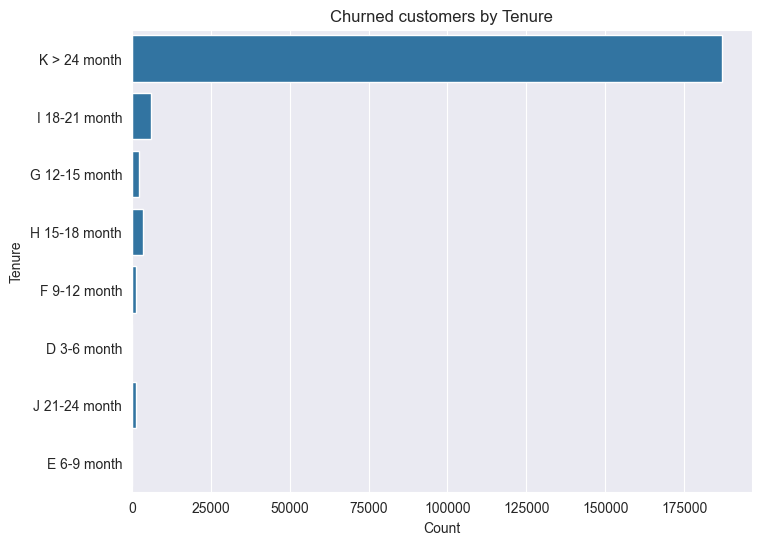

In [22]:
#filter data for churned instances (positive class)
churned_data = train[train['CHURN']==1]

#creating horizontal bar plot
plt.figure(figsize=(8, 6))
sns.countplot(y='TENURE', data = churned_data)

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('Tenure')
plt.title('Churned customers by Tenure')

#show the plot
plt.show()

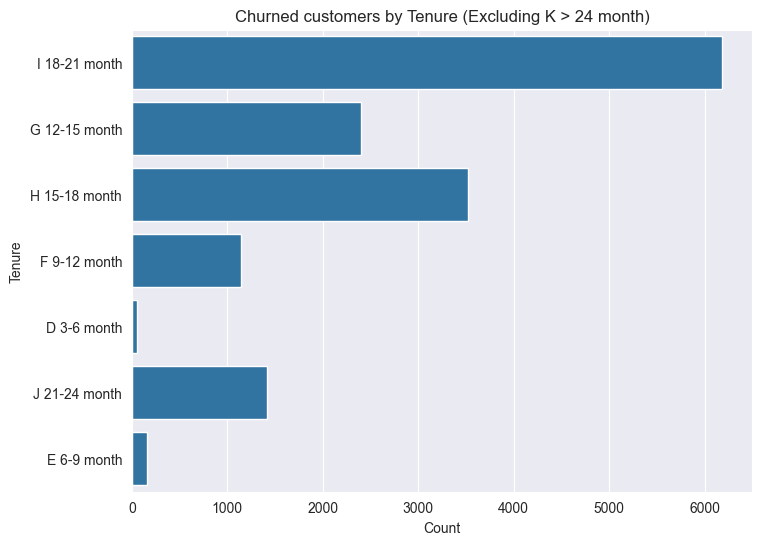

In [23]:
#filter data for churned instances (positive class)
churned_data = train[train['CHURN']==1]

#Filtering out 'K > 24' column 
filtered_data = churned_data[churned_data['TENURE']!='K > 24 month']

#creating horizontal bar plot
plt.figure(figsize=(8, 6))
sns.countplot(y='TENURE', data = filtered_data)

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('Tenure')
plt.title('Churned customers by Tenure (Excluding K > 24 month)')

#show the plot
plt.show()

Clients who have stayed longer with the telecom company are most likely to churn. Probably due to searching for better alternatives in the competitive market.


2. What is the relationship between Region and Churn? Are there regions with higher churn rates than others? 

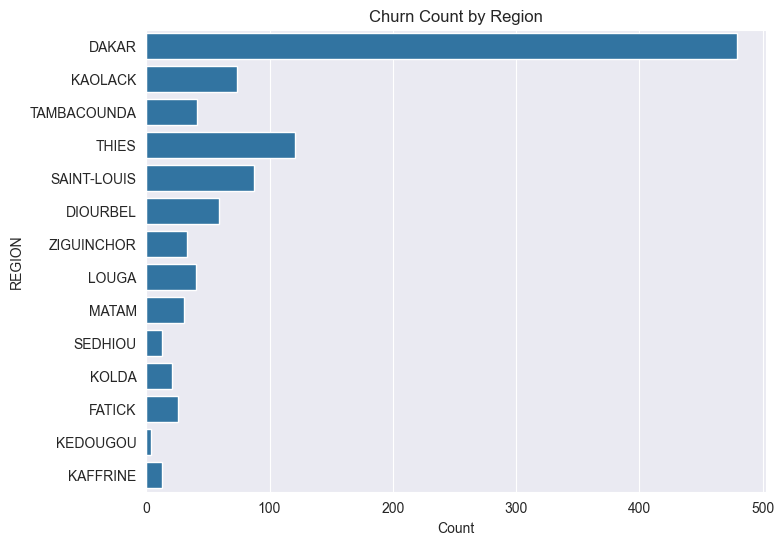

In [24]:
#df is a train dataframe having rows without missing values

df['CHURN'] = df['CHURN'].replace({1:'Yes', 0: 'No'})
#filter data for churned instances (positive class)
churned_data = df[df['CHURN']=='Yes']

#creating horizontal bar plot
plt.figure(figsize=(8, 6))
sns.countplot(y='REGION', data = churned_data)

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Churn Count by Region')

#show the plot
plt.show()

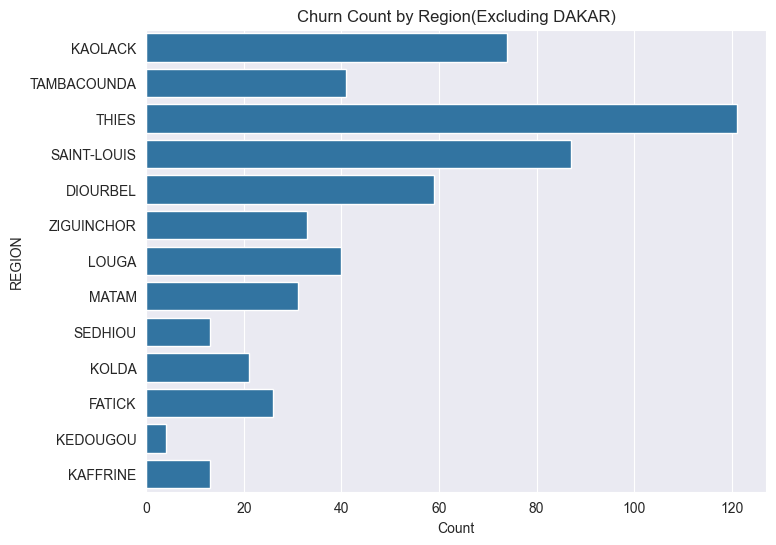

In [25]:
#filter data for churned instances (positive class)
churned_data = df[df['CHURN']=='Yes']

#Filtering out 'DAKAR' Region
filtered_data = churned_data[churned_data['REGION']!='DAKAR']

#creating horizontal bar plot
plt.figure(figsize=(8, 6))
sns.countplot(y='REGION', data = filtered_data)

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Churn Count by Region(Excluding DAKAR)')

#show the plot
plt.show()

Dakar is the region having most customers who have churned

## Preprocessing

Drop of unecessary columns in both train & test set

In [26]:
#We will drop REGION, TOP_PACK, and MRG. They have less contribution in prediction of the target.
#We will also replace the missing values for the numerical columns with their means (averages)

train.drop(columns=['REGION', 'MRG', 'TOP_PACK', 'ZONE1', 'ZONE2'], inplace=True) #drop these columns

In [27]:
#check if columns are dropped in train set
train.columns

Index(['user_id', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [28]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK', 'ZONE1', 'ZONE2'], inplace=True)

In [29]:
#check if columns are dropped in test set
test.columns

Index(['user_id', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')

Filling of Missing values(NAs)

In [30]:
#Fill NAs for train data

train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [31]:
#Preview of modified train data
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,62,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,3,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,1,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,61,7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,56,11.000000,0


In [32]:
#Check of missing values in modified train set

train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [33]:
#Fill NAs for test data

test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [34]:
#Preview of modified test data

test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,22.95227,35,5.000000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,2,9.234326
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22.95227,22,9.234326
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,6,9.234326
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,0.00000,60,4.000000


In [35]:
#Check of missing values in modified test set

test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Machine Learning

In [36]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(1077024, 12)
(1077024,)
(190063, 12)


# Preprocessing

In [37]:
#df has both numerical and categorical columns
#categorical columns
categorical_cols = ['TENURE']

numerical_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']


encoder = LabelEncoder()

# Define the transformers
categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols)
])

In [38]:
#Fit and transform the training data using the preprocessor
#Preprocessing training set
X_train_transformed = preprocessor.fit_transform(x) 

#Transform the test data using the preprocessor
test_data_transformed = preprocessor.transform(test) 

In [39]:
#Check on class distribution of target variable before balancing

print(f'Class distribution before balancing dataset:')
print(y.value_counts())

Class distribution before balancing dataset:
CHURN
0    875031
1    201993
Name: count, dtype: int64


In [40]:
x.columns

Index(['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'FREQ_TOP_PACK'],
      dtype='object')

In [41]:
# Create DataFrames for the transformed datas
X_train_t = pd.DataFrame(X_train_transformed )
test_t = pd.DataFrame(test_data_transformed)

# Define the column names
numerical_features = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']

categorical_features = ['TENURE']

# Add the column names to the DataFrame if available
if hasattr(preprocessor.named_transformers_['cat']['ordinal'], 'get_feature_names_out'):
    # Get the one-hot encoded column names
    cat_columns = preprocessor.named_transformers_['cat']['ordinal'].get_feature_names_out(categorical_features)
    # Combine the categorical and numerical column names

    all_columns = list(cat_columns) + numerical_features 
    X_train_t.columns = all_columns
    test_t.columns = all_columns

In [42]:
#Use of SMOTE to generate synthetic values for the minority class

smote = SMOTE(random_state=40)
X_train_resampled , y_train_resampled = smote.fit_resample(X_train_t, y)

print(f'Class distribution after balancing dataset: \n {y_train_resampled.value_counts()}')

Class distribution after balancing dataset: 
 CHURN
0    875031
1    875031
Name: count, dtype: int64


In [44]:
#Split training data into train and' test split